# **Subtask 1.1**

In [ ]:
from google.colab import drive
import os
import cv2 
import numpy as np
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')
path_covid_data='DMV_Assess_1_Covid-19_Dataset/Covid-19'
path_normal_data='DMV_Assess_1_Covid-19_Dataset/Normal'
image_dir='mixed_images'
covid_names = os.listdir(path_covid_data)
normal_names = os.listdir(path_normal_data)
size = (512, 512)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if not os.path.exists(image_dir):
  os.mkdir(image_dir)
for i in range(len(covid_names)):
    img = cv2.imread(path_covid_data+'/'+covid_names[i])
    img_resized = cv2.resize(img, size)
    img_gray = np.dot(img_resized, [0.299, 0.587, 0.114])
    cv2.waitKey()
    cv2.imwrite(image_dir+'/Covid19_'+ str(i) +'.png', img_gray)
for i in range(len(normal_names)):
    img = cv2.imread(path_normal_data+'/'+normal_names[i])
    img_resized = cv2.resize(img, size)
    img_gray = np.dot(img_resized, [0.299, 0.587, 0.114])
    cv2.waitKey()
    cv2.imwrite(image_dir+'/Normal_'+ str(i) +'.png', img_gray)

In [ ]:
import pandas as pd
filenames = os.listdir(image_dir)
categories = []
for filename in filenames:
    if filename.split('_')[0] == 'Normal':
        categories.append('Normal')
    else:
        categories.append('Covid19')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [ ]:
df

,filename,category
0,Covid_0.png,Covid19
1,Covid_9.png,Covid19
2,Covid_4.png,Covid19
3,Covid_2.png,Covid19
4,Covid_10.png,Covid19
...,...,...
295,Covid19_95.png,Covid19
296,Covid19_96.png,Covid19
297,Covid19_97.png,Covid19
298,Covid19_98.png,Covid19


In [ ]:
train_data= pd.concat([df[0:80],df[100:180]])
test_data= pd.concat([df[80:100],df[180:200]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(ResNet50(include_top = False, weights='imagenet', pooling = 'avg'))
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))
model.layers[0].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
train_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_dataframe(
    train_data, 
    image_dir,
    x_col='filename',
    y_col='category',
    target_size=(size[0], size[1]),
    class_mode='categorical',
    batch_size=20
)

Found 160 validated image filenames belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=30,steps_per_epoch=train_data.shape[0]/20,)

Epoch 1/30
8/8 [==============================] - 5s 338ms/step - loss: 1.6127 - accuracy: 0.4208
Epoch 2/30
8/8 [==============================] - 3s 344ms/step - loss: 0.7858 - accuracy: 0.4671
Epoch 3/30
8/8 [==============================] - 3s 351ms/step - loss: 0.7675 - accuracy: 0.4219
Epoch 4/30
8/8 [==============================] - 3s 350ms/step - loss: 0.7462 - accuracy: 0.4899
Epoch 5/30
8/8 [==============================] - 3s 354ms/step - loss: 0.7447 - accuracy: 0.6144
Epoch 6/30
8/8 [==============================] - 3s 353ms/step - loss: 0.7375 - accuracy: 0.4801
Epoch 7/30
8/8 [==============================] - 3s 352ms/step - loss: 0.6925 - accuracy: 0.5681
Epoch 8/30
8/8 [==============================] - 3s 347ms/step - loss: 0.6559 - accuracy: 0.6951
Epoch 9/30
8/8 [==============================] - 3s 340ms/step - loss: 0.6748 - accuracy: 0.5007
Epoch 10/30
8/8 [==============================] - 3s 341ms/step - loss: 0.6455 - accuracy: 0.6171
Epoch 11/30
8/8 [==

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


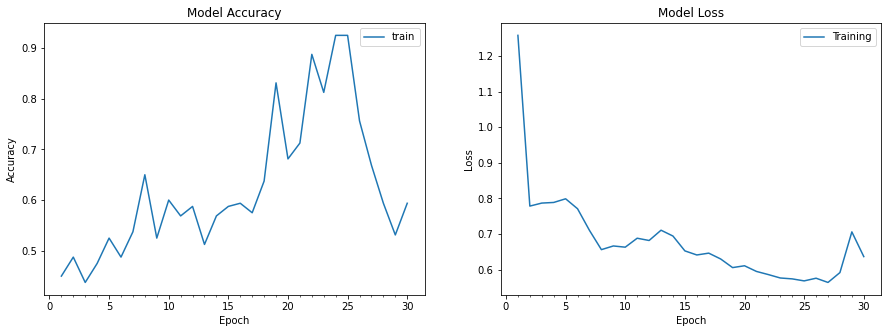

In [ ]:
import matplotlib.pyplot as plt
def plot_model_history(model_history, acc='accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['Training'], loc='best')
    plt.show()
plot_model_history(history)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_data, 
    image_dir,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(size[0], size[1]),
    batch_size=4,
    shuffle=False
)

Found 40 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(test_data.shape[0]/4))
predict_round=np.round(predict)
# print(predict_round)

In [ ]:
test_data = test_data.replace('Covid19', 0).replace('Normal', 1) 
labels = ['Normal','Covid19']
from sklearn.metrics import classification_report
print(classification_report(y_true=test_data.category, y_pred=predict_round[:,[1]],target_names=labels))

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        20
     Covid19       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


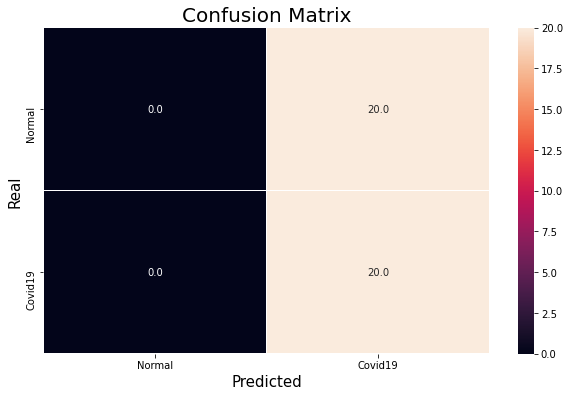

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm= confusion_matrix(y_true=test_data.category, y_pred=predict_round[:,[1]])
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidths=0.05, fmt= '.1f',xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize = 20)
plt.ylabel("Real",fontsize = 15)
plt.xlabel("Predicted",fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

# **Subtask 1.2**

In [ ]:
path_covid_data='DMV_Assess_1_Covid-19_Dataset/Covid-19'
path_normal_data='DMV_Assess_1_Covid-19_Dataset/Normal'
path_synthetic_data='LR0.0005_BS128_EP20000'
imageset_dir='mixed_three_images'
covid_names = os.listdir(path_covid_data)
normal_names = os.listdir(path_normal_data)
synthetic_names= os.listdir(path_synthetic_data)
size = (512, 512)
if not os.path.exists(imageset_dir):
  os.mkdir(imageset_dir)
for i in range(50):
    img = cv2.imread(path_covid_data+'/'+covid_names[i])
    img_resized = cv2.resize(img, size)
    img_gray = np.dot(img_resized, [0.299, 0.587, 0.114])
    cv2.waitKey()
    cv2.imwrite(imageset_dir+'/Covid19_'+ str(i) +'.png', img_gray)
for i in range(50):
    img = cv2.imread(path_synthetic_data+'/'+synthetic_names[i+15])
    img_resized = cv2.resize(img, size)
    img_gray = np.dot(img_resized, [0.299, 0.587, 0.114])
    cv2.waitKey()
    cv2.imwrite(imageset_dir+'/Synthetic_'+ str(i) +'.png', img_resized)
for i in range(100):
    img = cv2.imread(path_normal_data+'/'+normal_names[i])
    img_resized = cv2.resize(img, size)
    img_gray = np.dot(img_resized, [0.299, 0.587, 0.114])
    cv2.waitKey()
    cv2.imwrite(imageset_dir+'/Normal_'+ str(i) +'.png', img_gray)

In [ ]:
filenames = os.listdir(imageset_dir)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'Normal':
        categories.append('Normal')
    else:
        categories.append('Covid19')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df

,filename,category
0,Covid19_0.png,Covid19
1,Covid19_1.png,Covid19
2,Covid19_2.png,Covid19
3,Covid19_3.png,Covid19
4,Covid19_4.png,Covid19
...,...,...
195,Normal_95.png,Normal
196,Normal_96.png,Normal
197,Normal_97.png,Normal
198,Normal_98.png,Normal


In [ ]:
train_data= pd.concat([df[0:40],df[50:90],df[100:180]])
test_data= pd.concat([df[40:50],df[90:100],df[180:200]])

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_dataframe(
    train_data, 
    imageset_dir,
    x_col='filename',
    y_col='category',
    target_size=(size[0], size[1]),
    class_mode='categorical',
    batch_size=20
)

history = model.fit(
    train_generator, 
    epochs=30,
    steps_per_epoch=train_data.shape[0]/20,
)

Found 160 validated image filenames belonging to 2 classes.
Epoch 1/30
8/8 [==============================] - 3s 331ms/step - loss: 0.5886 - accuracy: 0.6625
Epoch 2/30
8/8 [==============================] - 3s 335ms/step - loss: 0.5764 - accuracy: 0.7125
Epoch 3/30
8/8 [==============================] - 3s 336ms/step - loss: 0.5386 - accuracy: 0.8750
Epoch 4/30
8/8 [==============================] - 3s 340ms/step - loss: 0.5387 - accuracy: 0.8313
Epoch 5/30
8/8 [==============================] - 3s 340ms/step - loss: 0.5165 - accuracy: 0.8250
Epoch 6/30
8/8 [==============================] - 3s 353ms/step - loss: 0.4975 - accuracy: 0.8313
Epoch 7/30
8/8 [==============================] - 3s 348ms/step - loss: 0.4844 - accuracy: 0.8500
Epoch 8/30
8/8 [==============================] - 3s 352ms/step - loss: 0.4653 - accuracy: 0.8687
Epoch 9/30
8/8 [==============================] - 3s 353ms/step - loss: 0.4552 - accuracy: 0.8813
Epoch 10/30
8/8 [==============================] - 3s 352m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


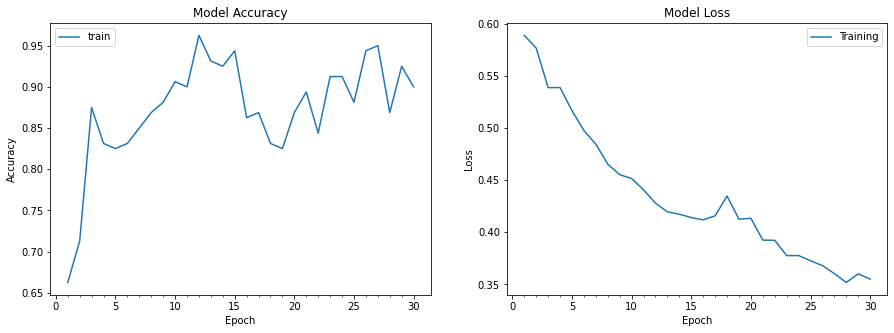

In [ ]:
plot_model_history(history)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_data, 
    imageset_dir,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(size[0], size[1]),
    batch_size=4,
    shuffle=False
)

Found 40 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(test_data.shape[0]/4))
predict_round=np.round(predict)
# print(predict_round)

In [ ]:
test_data = test_data.replace('Covid19', 0).replace('Normal', 1) 
labels = ['Normal','Covid19']
print(classification_report(y_true=test_data.category, y_pred=predict_round[:,[1]],target_names=labels))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        20
     Covid19       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



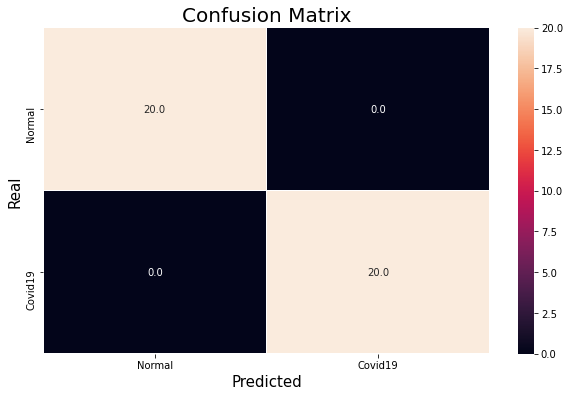

In [ ]:
cm= confusion_matrix(y_true=test_data.category, y_pred=predict_round[:,[1]])
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidths=0.05, fmt= '.1f',xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize = 20)
plt.ylabel("Real",fontsize = 15)
plt.xlabel("Predicted",fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()